#Project8- To perform EDA and to predict the Average Price of Avocado based on different parameters

In [1]:
#Importing some neccessary libraries
import pandas as pd
import numpy as np

In [2]:
df_avocado=pd.read_csv('avocado.csv',parse_dates=['Date'])
df_avocado

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16463,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16464,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16465,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16466,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can see that there are many Null values present in this data which we have to clean

In [3]:
#Removing the Null values to clean our data
df_avocado.dropna(axis=0,how='all',inplace=True)
df_avocado.drop('Unnamed: 0',axis=1,inplace=True)


In [4]:
df_avocado.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,2015-06-12,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [5]:
#Adding Date,Month and Year Column to get the better insight
df_avocado['date']=pd.DatetimeIndex(df_avocado['Date']).day
df_avocado['Month']=pd.DatetimeIndex(df_avocado['Date']).month_name()
df_avocado['Year']=pd.DatetimeIndex(df_avocado['Date']).year

In [6]:
df_avocado.drop('Date',axis=1,inplace=True)

In [7]:
df_avocado.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,date,Month,Year
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany,27,December,2015
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany,20,December,2015
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany,13,December,2015
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany,12,June,2015
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany,29,November,2015


In [8]:
df_avocado.tail()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,date,Month,Year
1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016.0,Charlotte,16,October,2016
1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016.0,Charlotte,10,September,2016
1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016.0,Charlotte,10,February,2016
1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016.0,Charlotte,25,September,2016
1516,1.43,182978.30,43116.41,54193.42,16563.91,69104.56,57456.21,11648.35,0.00,conventional,2016.0,Charlotte,18,September,2016


In [9]:
# Grouping datasets to make it the data frame easy to understand
df=df_avocado.groupby(['Year','Month'])
df.first()


AveragePrice  Total Volume       4046       4225      4770  \
Year Month                                                                   
2015 April              1.31      61007.10    2268.32   49880.67    101.36   
     August             0.98     109428.33     703.75  101815.36     80.00   
     December           1.33      64236.62    1036.74   54454.85     48.16   
     February           1.45      75133.10     509.94   62035.06    741.08   
     January            1.02      99811.42    1022.15   87315.57     85.34   
     July               1.11     106757.10     648.75   91949.05    966.61   
     June               1.08      78992.15    1132.00   71976.41     72.58   
     March              1.20      59197.67     919.87   45490.05    217.24   
     May                1.35     109252.12     869.45   72600.55   5883.16   
     November           1.28      51039.60     941.48   43838.39     75.78   
     October            1.07      74338.76     842.40   64757.44    113.00   
     September          0.99     106803.39    1204.88   99409.21    154.84   
2016 April              1.48     113031.96    6530.78   99746.05     50.84   
     August             0.81     643699.77  199995.47  159036.97    253.52   
     December           1.52      73341.73    3202.39   58280.33    426.92   
     February           1.51      75480.26    4109.22   57515.76     84.08   
     January            0.77     735635.49  241665.17  211776.98     54.42   
     July               0.76     722211.00  415641.47  134517.41    418.98   
     June               1.63      57178.20    3212.04   43024.32     36.40   
     March              1.03     423485.95  253540.83   69327.44   1349.18   
     May                1.33     860858.18   61074.05  537895.97  46714.72   
     November           1.49      71777.85    2323.39   56545.79     86.65   
     October            1.46      58375.10    3187.14   45898.52     54.31   
     September          1.13     101087.84    3641.46   87174.41    102.15   

                Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
Year Month                                                                      
2015 April         8756.75     8379.98      376.77         0.00  conventional   
     August        6829.22     6266.85      562.37         0.00  conventional   
     December      8696.87     8603.62       93.25         0.00  conventional   
     February     11847.02    11768.52       78.50         0.00  conventional   
     January      11388.36    11104.53      283.83         0.00  conventional   
     July         13192.69    13061.53      131.16         0.00  conventional   
     June          5811.16     5677.40      133.76         0.00  conventional   
     March        12570.51    12201.95      368.56         0.00  conventional   
     May          29898.96    29663.19      235.77         0.00  conventional   
     November      6183.95     5986.26      197.69         0.00  conventional   
     October       8625.92     8061.47      564.45         0.00  conventional   
     September     6034.46     5888.87      145.59         0.00  conventional   
2016 April         6704.29     6476.12      228.17         0.00  conventional   
     August      284413.81    77087.90   206444.51       881.40  conventional   
     December     11432.09    11017.32      411.83         2.94  conventional   
     February     13771.20    13345.52      425.68         0.00  conventional   
     January     282138.92    64801.33   217337.59         0.00  conventional   
     July        171633.14    77183.81    94449.33         0.00  conventional   
     June         10905.44    10474.09      431.35         0.00  conventional   
     March        99268.50    62657.11    36611.39         0.00  conventional   
     May         215173.44   203788.41     8328.92      3056.11  conventional   
     November     12822.02    12176.75      645.27         0.00  conventional   
     October       9235.13     9153.12     

In [10]:
# Checking datatypes of each variables
df_avocado.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year            float64
region           object
date              int64
Month            object
Year              int64
dtype: object

In [11]:
#Checking for null values
df_avocado.isnull().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
date            0
Month           0
Year            0
dtype: int64

In [12]:
#Checking description of dataset
df_avocado.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,date,Year
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821,15.253790,2015.162821
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324,8.965902,0.369324
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000,1.000000,2015.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000,7.000000,2015.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000,15.000000,2015.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000,22.000000,2015.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000,31.000000,2016.000000


In [13]:
#Checking Correlation
df_avocado.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,date,Year
AveragePrice,1.000000,-0.140470,-0.190096,-0.092084,-0.100567,-0.111597,-0.097682,-0.177480,-0.048284,0.178683,0.092589,0.178683
Total Volume,-0.140470,1.000000,0.985568,0.987154,0.934347,0.967689,0.960642,0.910226,0.521717,-0.004189,-0.034857,-0.004189
4046,-0.190096,0.985568,1.000000,0.951952,0.898570,0.930395,0.922278,0.884229,0.474063,-0.040439,-0.031806,-0.040439
4225,-0.092084,0.987154,0.951952,1.000000,0.927757,0.951779,0.943988,0.900496,0.504718,-0.007254,-0.044008,-0.007254
4770,-0.100567,0.934347,0.898570,0.927757,1.000000,0.926405,0.923607,0.840523,0.646053,0.029222,-0.021318,0.029222
Total Bags,-0.111597,0.967689,0.930395,0.951779,0.926405,1.000000,0.997341,0.911336,0.601856,0.090108,-0.021137,0.090108
Small Bags,-0.097682,0.960642,0.922278,0.943988,0.923607,0.997341,1.000000,0.879131,0.611300,0.106382,-0.016462,0.106382
Large Bags,-0.177480,0.910226,0.884229,0.900496,0.840523,0.911336,0.879131,1.000000,0.447779,-0.018678,-0.046578,-0.018678
XLarge Bags,-0.048284,0.521717,0.474063,0.504718,0.646053,0.601856,0.611300,0.447779,1.000000,0.218342,0.019315,0.218342
year,0.178683,-0.004189,-0.040439,-0.007254,0.029222,0.090108,0.106382,-0.018678,0.218342,1.000000,0.029744,1.000000


--Performing EDA for the above data to get insight of data--

In [14]:
#Importing some more necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt

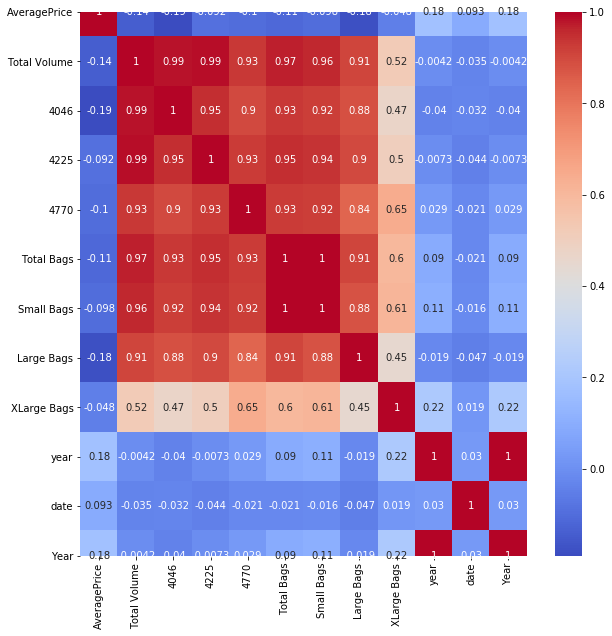

In [15]:
#Checking of correlation of features with each other
plt.figure(figsize=(10,10))
sns.heatmap(df_avocado.corr(),cmap='coolwarm',annot=True)
plt.show()

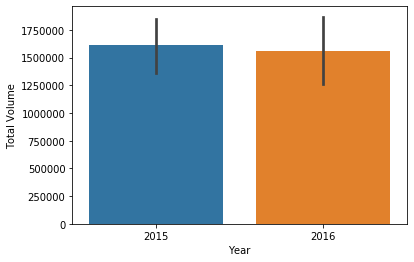

In [16]:
sns.barplot(x='Year',y='Total Volume',data=df_avocado)
plt.show()

We can see that production in both year is almost similar

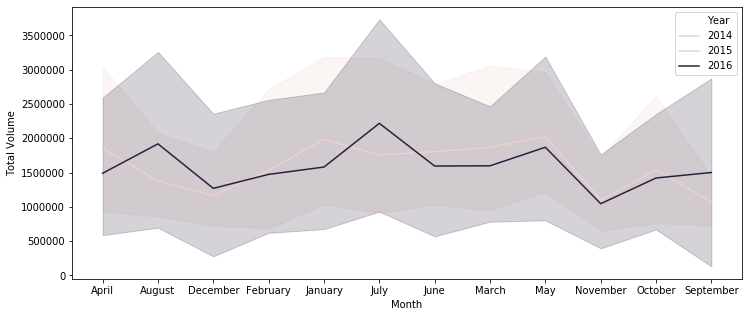

In [17]:
plt.figure(figsize=(12,5))
sns.lineplot(x="Month",y="Total Volume",hue='Year',data=df_avocado)
plt.show()

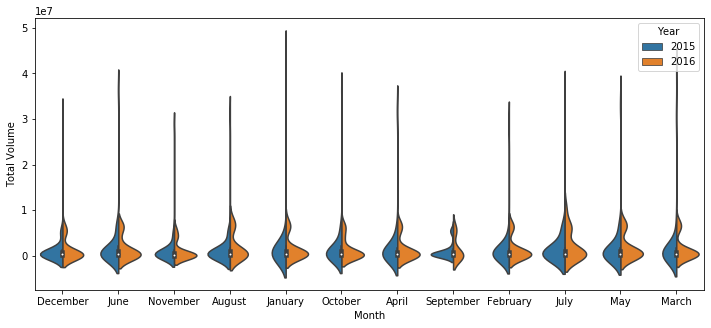

In [18]:
plt.figure(figsize=(12,5))
sns.violinplot(y="Total Volume",x='Month',hue='Year',split=True,scale='area',dodge=False,data=df_avocado)
plt.show()

We can see that proudction in both years is similar and maximum production in month of July

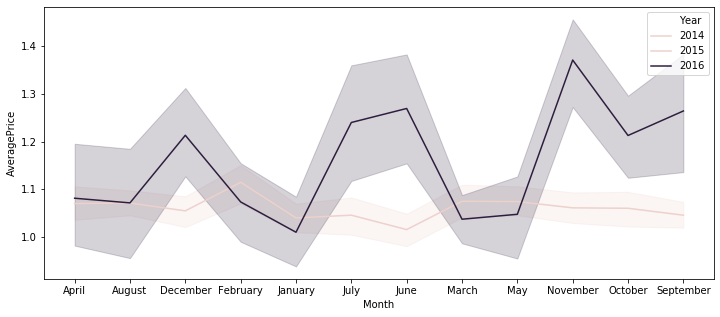

In [19]:
plt.figure(figsize=(12,5))
sns.lineplot(y="AveragePrice",x="Month",hue="Year",data=df_avocado)
plt.show()

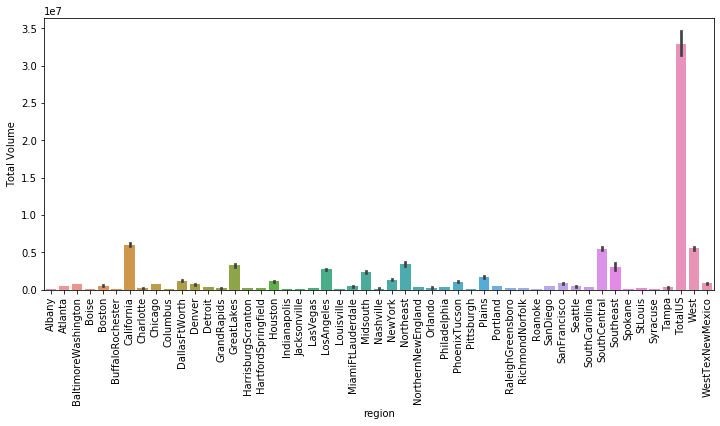

In [20]:
plt.figure(figsize=(12,5))
sns.barplot(y="Total Volume",x="region",data=df_avocado)
plt.xticks(rotation=90)
plt.show()

In [109]:
df_avocado.drop('XLarge Bags',axis=1,inplace=True)

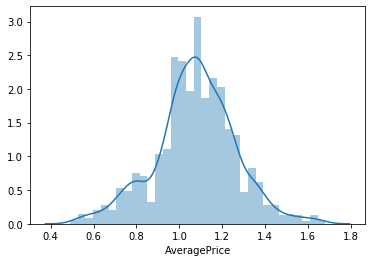

In [21]:
sns.distplot(a=df_avocado.AveragePrice, kde=True)
plt.show()

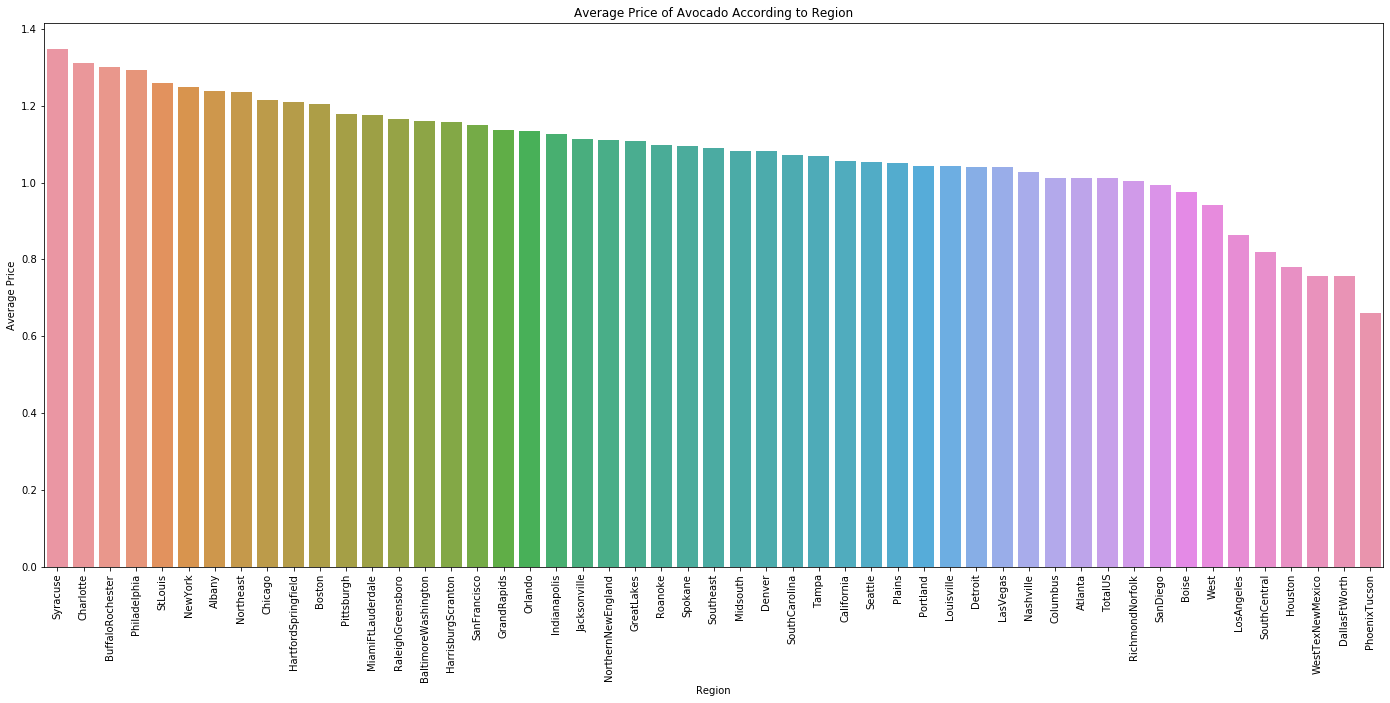

In [22]:
region_list=list(df_avocado.region.unique())
average_price=[]

for i in region_list:
    x=df_avocado[df_avocado.region==i]
    region_average=sum(x.AveragePrice)/len(x)
    average_price.append(region_average)

df1=pd.DataFrame({'region_list':region_list,'average_price':average_price})
new_index=df1.average_price.sort_values(ascending=False).index.values
sorted_data=df1.reindex(new_index)

plt.figure(figsize=(24,10))
ax=sns.barplot(x=sorted_data.region_list,y=sorted_data.average_price)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price of Avocado According to Region')
plt.show()

We can see the area/region wise plot for prices

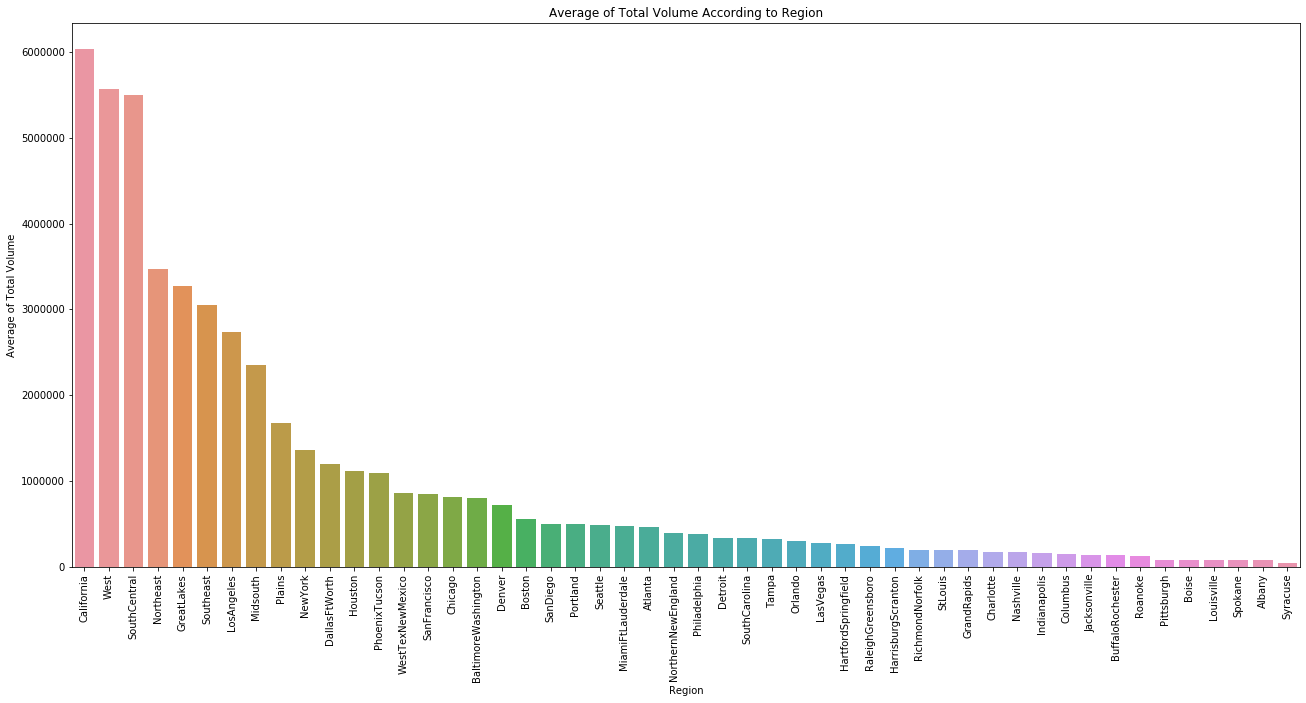

In [23]:
filter1=df_avocado.region!='TotalUS'
df1=df_avocado[filter1]

region_list=list(df1.region.unique())
average_total_volume=[]

for i in region_list:
    x=df1[df1.region==i]
    average_total_volume.append(sum(x['Total Volume'])/len(x))
df3=pd.DataFrame({'region_list':region_list,'average_total_volume':average_total_volume})

new_index=df3.average_total_volume.sort_values(ascending=False).index.values
sorted_data1=df3.reindex(new_index)

plt.figure(figsize=(22,10))
ax=sns.barplot(x=sorted_data1.region_list,y=sorted_data1.average_total_volume)

plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average of Total Volume')
plt.title('Average of Total Volume According to Region')
plt.show()

We can see the total volume produced, region wise, maximum production in California

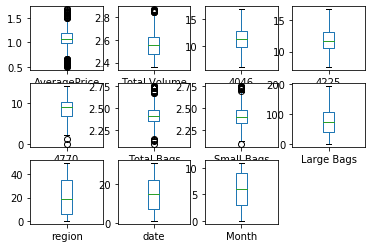

In [110]:
#Checking for outliers using box plot
df_avocado.plot(kind='box',subplots=True,layout=(3,4))
plt.show()

We can see that there are outliers which we have to remove

** Training our machine to get best prediction model **

In [111]:
#Removing outliers using z score
from scipy.stats import zscore
z_score=np.abs(zscore(df_avocado))
z_score

array([[1.35048079, 1.45084204, 1.82816171, ..., 1.3143384 , 1.31052998,
        0.48063718],
       [1.45639674, 1.58385278, 2.01206913, ..., 1.3143384 , 0.52953678,
        0.48063718],
       [0.76783831, 0.95290856, 1.94183376, ..., 1.3143384 , 0.25145642,
        0.48063718],
       ...,
       [2.14485045, 0.63144101, 0.20190426, ..., 0.88028586, 0.58616779,
        0.19933834],
       [2.09189247, 0.58674675, 0.13577946, ..., 0.88028586, 1.08738906,
        0.76193603],
       [1.88006056, 0.61205316, 0.23299293, ..., 0.88028586, 0.30639586,
        0.76193603]])

In [112]:
print(df_avocado.shape)
thresold=3
avocado=df_avocado[(z_score<3).all(axis=1)]
avocado.shape

(1517, 11)


(1512, 11)

We can see that  outliers are removed 

In [113]:
# In this data set we need encryption as data is not in the form of string/numbers

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list=['Month']
for val in list:
    avocado[val]=le.fit_transform(avocado[val].astype(str))

In [114]:
avocado.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,region,date,Month
0,1.33,2.404270,6.944801,10.905146,3.895080,2.205064,2.203875,20.665669,0,27,6
1,1.35,2.389943,6.515127,10.706381,4.083115,2.214818,2.213692,21.067687,0,20,6
2,0.93,2.457905,6.679222,11.600485,4.879007,2.197816,2.196400,21.582864,0,13,6
3,1.08,2.422776,7.032624,11.184108,4.298373,2.159604,2.156915,24.044267,0,12,10
4,1.28,2.383278,6.848515,10.688288,4.340944,2.166751,2.163023,28.002574,0,29,3


In [115]:
#Checking for skewness in data
avocado.skew()

AveragePrice   -0.142521
Total Volume    0.429756
4046           -0.157399
4225            0.189753
4770           -0.338361
Total Bags      0.340670
Small Bags      0.383478
Large Bags      0.167789
region          0.284747
date            0.040071
Month           0.076751
dtype: float64

In [116]:
#Lets seprate the input and ouput variable
df_x=avocado.drop(columns=['AveragePrice'])
y=avocado['AveragePrice']


In [117]:
#Using standard scalar method to Normalize our data or to bring all variable to common scale
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
x=scale.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

In [118]:
#Again checking for skewness
x.skew()

Total Volume    0.429756
4046           -0.157399
4225            0.189753
4770           -0.338361
Total Bags      0.340670
Small Bags      0.383478
Large Bags      0.167789
region          0.284747
date            0.040071
Month           0.076751
dtype: float64

We can see that no skewness is present as all index are in the range of -0.5 to 0.5

#In this data set we can see that there is linear/continuos data for independable variable hence we use regression method to train and predict the variables

In [119]:
#Importing some neccessary libraries 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


In [120]:
#Checking for best random state which give best r2 score for various training techniques used to get best prediction
# Defining a function to check for best random state and r2 score.
def maxr2_score(tec,x,y):
    max_r_score=0
    for r_state in range(42,100):
        train_x,test_x,train_y,test_y = train_test_split(x,y,random_state = r_state,test_size=0.20)
        tec.fit(train_x,train_y)
        pred = tec.predict(test_x)
        temp=r2_score(test_y,pred)
        if temp>max_r_score:
            max_r_score=temp
            final_r_state=r_state
    print("max r2 score is : ",max_r_score, 'corresponding to random state: ',final_r_state,)

In [131]:
#Importing various methods from libraries
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn import svm
from sklearn.svm import SVR

In [122]:
LR=LinearRegression()
maxr2_score(LR,x,y)

max r2 score is :  0.4724988701200361 corresponding to random state:  87


In [123]:
DT=DecisionTreeRegressor()
maxr2_score(DT,x,y)

max r2 score is :  0.7992231047738634 corresponding to random state:  79


In [127]:
KN=KNeighborsRegressor()
maxr2_score(KN,x,y)

max r2 score is :  0.6945252601446805 corresponding to random state:  87


In [129]:
SV=SVR()
maxr2_score(SV,x,y)

max r2 score is :  0.7449812927604577 corresponding to random state:  87


In [130]:
RF=RandomForestRegressor()
maxr2_score(RF,x,y)

max r2 score is :  0.8471685114080717 corresponding to random state:  90


In [132]:
AB=AdaBoostRegressor()
maxr2_score(AB,x,y)

max r2 score is :  0.6668682955047127 corresponding to random state:  73


In [133]:
GB=GradientBoostingRegressor()
maxr2_score(GB,x,y)

max r2 score is :  0.7853102993723851 corresponding to random state:  75


We can see that we are getting maximum r2 score with Random Forest and Decision Tree Model, we will try to improve this by
using best parameters from Grid Search CV

In [139]:
#Using Grid search CV for best parameters
DT=DecisionTreeRegressor()
parameters = {'criterion':['mae','mse']}
clf = GridSearchCV(DT,parameters, cv=10)
clf.fit(x,y)
clf.best_params_

{'criterion': 'mae'}

In [140]:
DT=DecisionTreeRegressor(criterion='mae')
maxr2_score(DT,x,y)

max r2 score is :  0.7588302794253314 corresponding to random state:  74


In [142]:
#Using Grid search CV for best parameters
RF=RandomForestRegressor()
parameters = {"n_estimators":[10,100,500]}
clf = GridSearchCV(RF, parameters, cv=10)
clf.fit(x,y)
clf.best_params_

{'n_estimators': 100}

In [143]:
RF=RandomForestRegressor(n_estimators=100)
maxr2_score(RF,x,y)

max r2 score is :  0.8555177857038552 corresponding to random state:  90


We can see that  maximum r2 score is given by Random Forest method

In [151]:
#Saving our final model using Random Forest Regression method
train_x,test_x,train_y,test_y = train_test_split(x,y,random_state=90,test_size=0.20)
RF.fit(train_x,train_y)
pred=RF.predict(test_x)

Text(0, 0.5, 'Predicted Y')

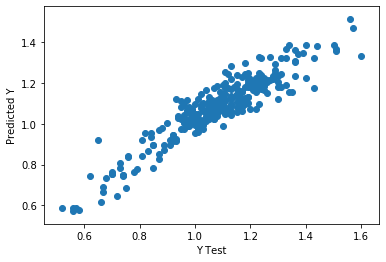

In [152]:
plt.scatter(x=test_y,y=pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

We can see that test and predicted values are scattering with each other 

In [153]:
#Finding RMSE and Mean absolute error for our final model
print("RMSE is: ",np.sqrt(mean_squared_error(test_y,pred)))
print('Mean Absolute error: ', mean_absolute_error(test_y,pred))

RMSE is:  0.07046171513900323
Mean Absolute error:  0.053100660066006604


In [154]:
#Saving final model using joblib
from sklearn.externals import joblib 
  

joblib.dump(RF, 'RF_avocado.pkl')

['RF_avocado.pkl']

** This is the best and final model we have saved **